Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
picadilly = pd.read_csv('./MCC_combined.csv',header=0, index_col=0)
sharston = pd.read_csv('./sharston_combined.csv',header=0,index_col=0)

In [4]:
#append columns withsite label for plotting
picadilly['siteID'] = np.repeat('Picadilly',picadilly.shape[0])
sharston['siteID'] = np.repeat('Sharston',sharston.shape[0])

In [5]:
column_names = ['NO2','temp','ws','wd','Volume','siteID']

In [6]:
#get 2018 and 2019 data
picadilly_values = picadilly[(picadilly.index >= '2019-01-01') & (picadilly.index <= '2019-12-31') ]
sharston_values = sharston[(sharston.index >= '2019-01-01') & (sharston.index <= '2019-12-31') ]

In [7]:
print(picadilly_values.shape, sharston_values.shape)

(8736, 34) (8736, 34)


In [8]:
picadilly_values = picadilly_values[column_names].values
sharston_values = sharston_values[column_names].values

In [9]:
print(picadilly_values.shape, sharston_values.shape)

(8736, 6) (8736, 6)


In [10]:
non_lockdown_data = pd.DataFrame(np.concatenate((picadilly_values,sharston_values),axis=0), columns=column_names)
non_lockdown_data

NO2 temp   ws     wd Volume     siteID
0      24.91854  8.3  4.6  276.3    180  Picadilly
1      22.77822  8.5  3.4  281.2    184  Picadilly
2      17.08441  8.6  3.0  272.4    195  Picadilly
3      18.80174  8.9  3.4  292.8    117  Picadilly
4      17.08404  9.2  3.3  302.2    112  Picadilly
...         ...  ...  ...    ...    ...        ...
17467  49.63519  6.8  2.7  223.1    272   Sharston
17468  46.96902  6.9  2.5  115.9    196   Sharston
17469  50.38628  6.8  1.3  169.0    162   Sharston
17470  46.58983  6.3  1.7  166.4    169   Sharston
17471  47.68793  5.1  1.7  191.9     85   Sharston

[17472 rows x 6 columns]

In [11]:
for i in column_names[:5]:
    non_lockdown_data[i] = non_lockdown_data[i].astype('int32')

non_lockdown_data['siteID'] = non_lockdown_data['siteID'].astype('category')

non_lockdown_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   NO2     17472 non-null  int32   
 1   temp    17472 non-null  int32   
 2   ws      17472 non-null  int32   
 3   wd      17472 non-null  int32   
 4   Volume  17472 non-null  int32   
 5   siteID  17472 non-null  category
dtypes: category(1), int32(5)
memory usage: 358.6 KB


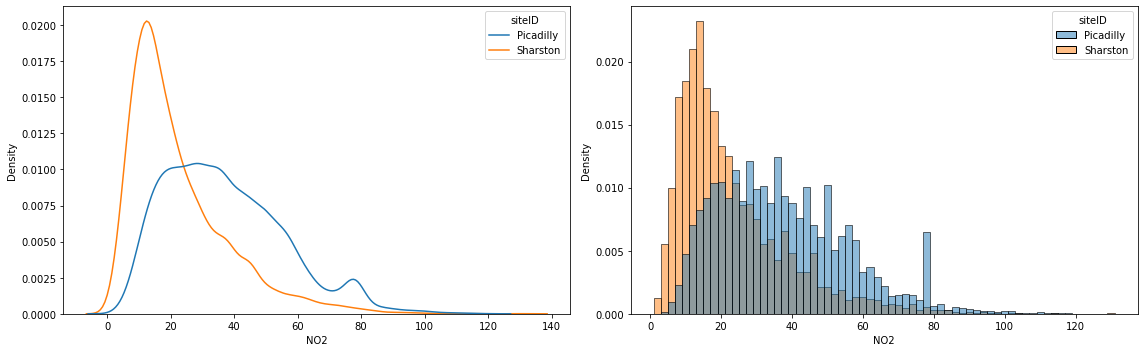

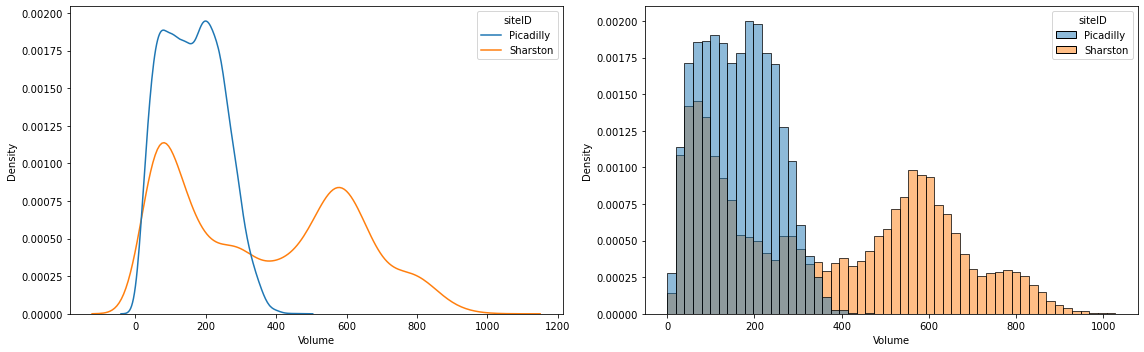

In [12]:
for a in range (0,5):
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data= non_lockdown_data, x = column_names[a],hue='siteID')
    plt.subplot(1,2,2)
    sns.histplot(data= non_lockdown_data, x = column_names[a], hue='siteID', stat='density')
    plt.xlabel(column_names[a])
    plt.ylabel('Density')
    plt.tight_layout()

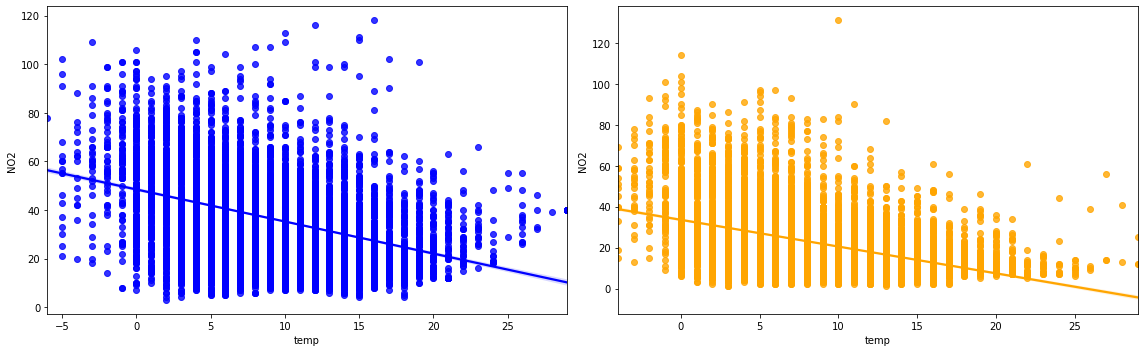

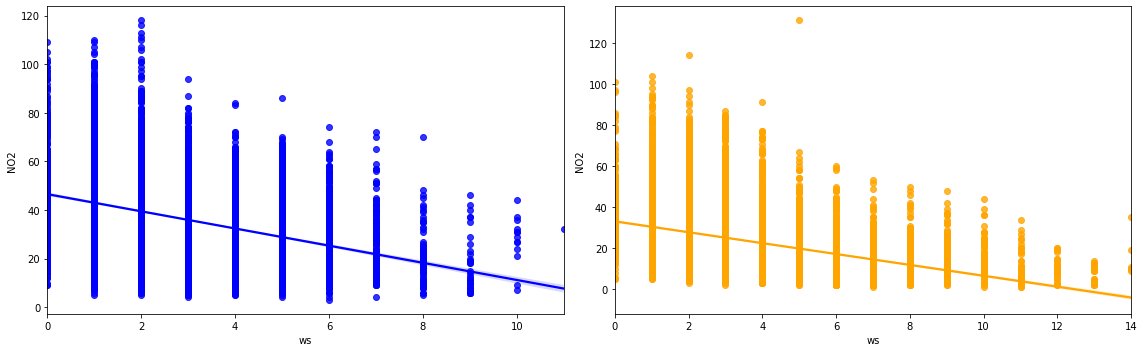

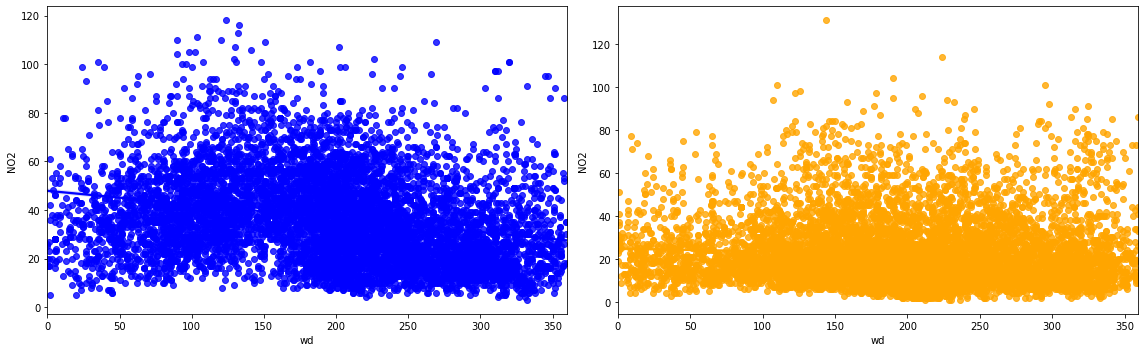

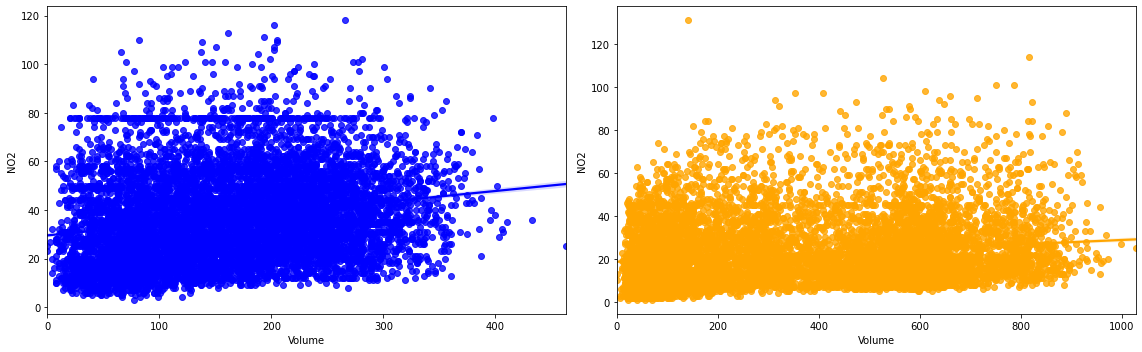

In [13]:
for a in range (1,5):
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.regplot(data= non_lockdown_data[non_lockdown_data['siteID']=='Picadilly'], x = column_names[a], y = 'NO2',color='blue')
    plt.subplot(1,2,2)
    sns.regplot(data= non_lockdown_data[non_lockdown_data['siteID']=='Sharston'], x = column_names[a], y = 'NO2',color='orange')
    plt.xlabel(column_names[a])
    plt.ylabel('NO2')
    plt.tight_layout()

In [14]:
#windroses
from windrose import WindroseAxes

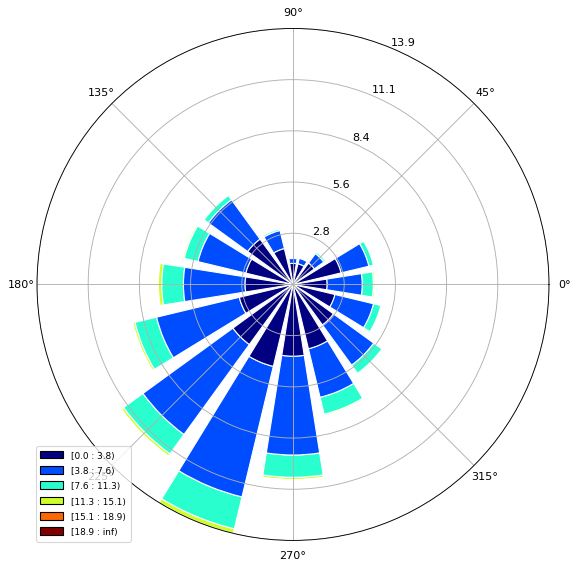

In [15]:
ax = WindroseAxes.from_ax()
ax.bar(sharston.wd,sharston.ws,normed=True,opening=0.8,edgecolor='white')
ax.set_legend()

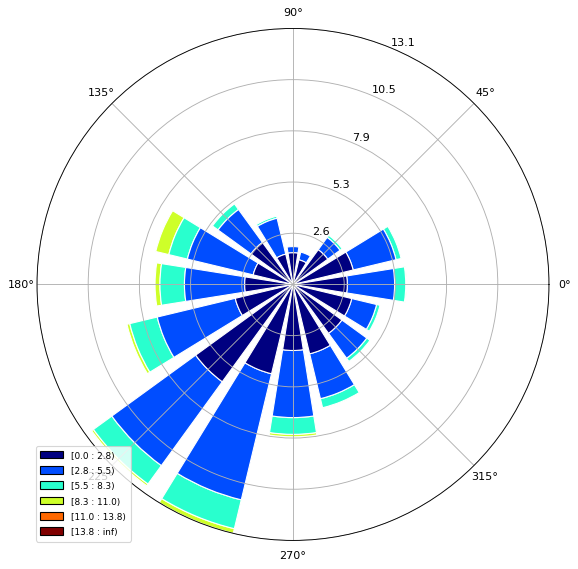

In [16]:
ax = WindroseAxes.from_ax()
ax.bar(picadilly.wd,picadilly.ws,normed=True,opening=0.8,edgecolor='white')
ax.set_legend()

In [17]:
#stack previous year months which correspond to lockdown dates
years = ['2020','2019','2018','2017','2016']
sharston_comparison = []
for i in years:
    sharston_comparison.append(sharston[(sharston.index >= i+'-03-23') & (sharston.index<= i+'-06-23')])
sharston_comparison = pd.concat(sharston_comparison)


picadilly_comparison = []
for i in years:
    picadilly_comparison.append(picadilly[(picadilly.index >= i+'-03-23') & (picadilly.index<= i+'-06-23')])
picadilly_comparison = pd.concat(picadilly_comparison)

<AxesSubplot:xlabel='day_of_week', ylabel='Volume'>

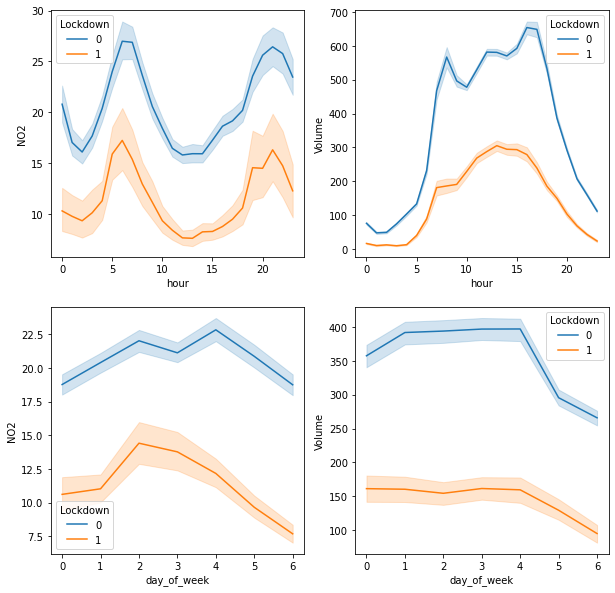

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.lineplot(x='hour',y='NO2',data=sharston_comparison,hue='Lockdown')
plt.subplot(2,2,2)
sns.lineplot(x='hour',y='Volume',data=sharston_comparison,hue='Lockdown')
plt.subplot(2,2,3)
sns.lineplot(x='day_of_week',y='NO2',data=sharston_comparison,hue='Lockdown')
plt.subplot(2,2,4)
sns.lineplot(x='day_of_week',y='Volume',data=sharston_comparison,hue='Lockdown')

<AxesSubplot:xlabel='day_of_week', ylabel='Volume'>

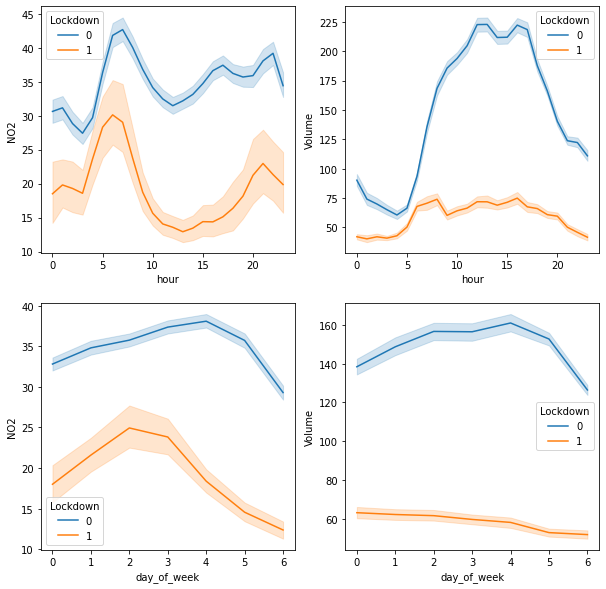

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.lineplot(x='hour',y='NO2',data=picadilly_comparison,hue='Lockdown')
plt.subplot(2,2,2)
sns.lineplot(x='hour',y='Volume',data=picadilly_comparison,hue='Lockdown')
plt.subplot(2,2,3)
sns.lineplot(x='day_of_week',y='NO2',data=picadilly_comparison,hue='Lockdown')
plt.subplot(2,2,4)
sns.lineplot(x='day_of_week',y='Volume',data=picadilly_comparison,hue='Lockdown')

In [20]:
picadilly_non_LD = picadilly[picadilly['Lockdown']==0].values
sharston_non_LD = sharston[sharston['Lockdown']==0].values

In [21]:
data_combined_non_ld = pd.DataFrame(np.concatenate((picadilly_non_LD,sharston_non_LD),axis=0),columns = picadilly.columns)
for i in data_combined_non_ld.columns[:-1]:
    data_combined_non_ld[i] = data_combined_non_ld[i].astype('int32')

data_combined_non_ld['siteID'] = data_combined_non_ld['siteID'].astype('category')


<AxesSubplot:xlabel='month', ylabel='Volume'>

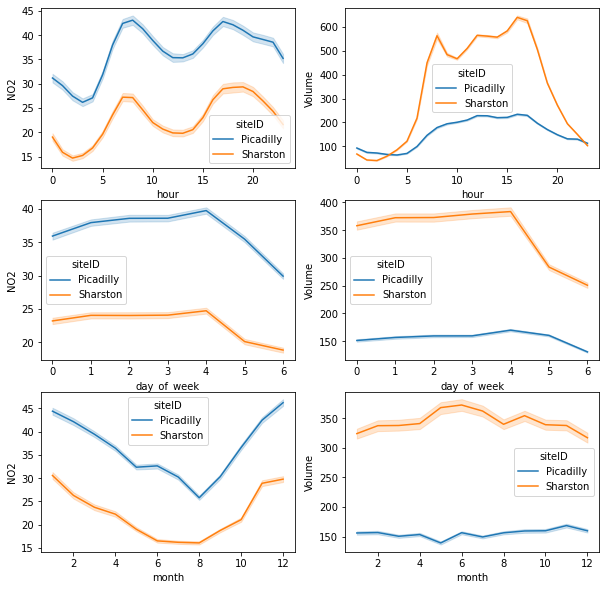

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.lineplot(x='hour',y='NO2',data=data_combined_non_ld,hue='siteID')
plt.subplot(3,2,2)
sns.lineplot(x='hour',y='Volume',data=data_combined_non_ld,hue='siteID')
plt.subplot(3,2,3)
sns.lineplot(x='day_of_week',y='NO2',data=data_combined_non_ld,hue='siteID')
plt.subplot(3,2,4)
sns.lineplot(x='day_of_week',y='Volume',data=data_combined_non_ld,hue='siteID')
plt.subplot(3,2,5)
sns.lineplot(x='month',y='NO2',data=data_combined_non_ld,hue='siteID')
plt.subplot(3,2,6)
sns.lineplot(x='month',y='Volume',data=data_combined_non_ld,hue='siteID')

TimeSeries

In [23]:
sharston.index = pd.to_datetime(sharston.index)
picadilly.index = pd.to_datetime(picadilly.index)

ts_sharston = pd.DataFrame(sharston[(sharston.index >= '2017-01-01') & (sharston.index <= '2019-12-31')][['NO2','Volume','ws','temp']])
ts_picadilly = pd.DataFrame(picadilly[(picadilly.index >= '2017-01-01') & (picadilly.index <= '2019-12-31')][['NO2','Volume','ws','temp']])

ts_sharston_daily = ts_sharston.resample('D').mean()
ts_sharston_monthly = ts_sharston.resample('M').mean()

ts_picadilly_daily = ts_picadilly.resample('D').mean()
ts_picadilly_monthly = ts_picadilly.resample('M').mean()


In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

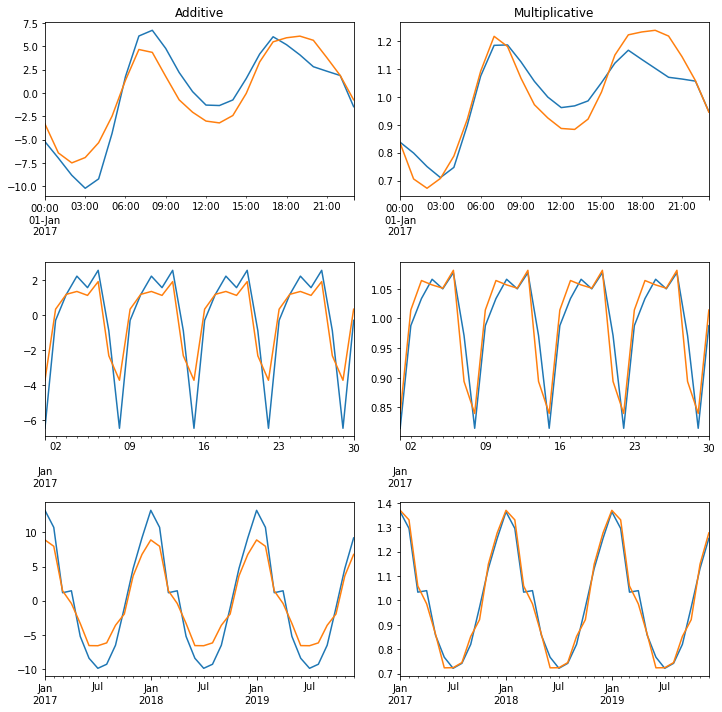

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
seasonal_decompose(ts_picadilly['NO2'], model='additive').seasonal[:24].plot()
seasonal_decompose(ts_sharston['NO2'], model='additive').seasonal[:24].plot()
plt.title('Additive')
plt.subplot(3,2,2)
seasonal_decompose(ts_picadilly['NO2'], model='multiplicative').seasonal[:24].plot()
seasonal_decompose(ts_sharston['NO2'], model='multiplicative').seasonal[:24].plot()
plt.title('Multiplicative')
plt.subplot(3,2,3)
seasonal_decompose(ts_picadilly_daily['NO2'], model='additive').seasonal[:30].plot()
seasonal_decompose(ts_sharston_daily['NO2'], model='additive').seasonal[:30].plot()
plt.subplot(3,2,4)
seasonal_decompose(ts_picadilly_daily['NO2'], model='multiplicative').seasonal[:30].plot()
seasonal_decompose(ts_sharston_daily['NO2'], model='multiplicative').seasonal[:30].plot()
plt.subplot(3,2,5)
seasonal_decompose(ts_picadilly_monthly['NO2'], model='additive').seasonal.plot()
seasonal_decompose(ts_sharston_monthly['NO2'], model='additive').seasonal.plot()
plt.subplot(3,2,6)
seasonal_decompose(ts_picadilly_monthly['NO2'], model='multiplicative').seasonal.plot()
seasonal_decompose(ts_sharston_monthly['NO2'], model='multiplicative').seasonal.plot()
plt.tight_layout()

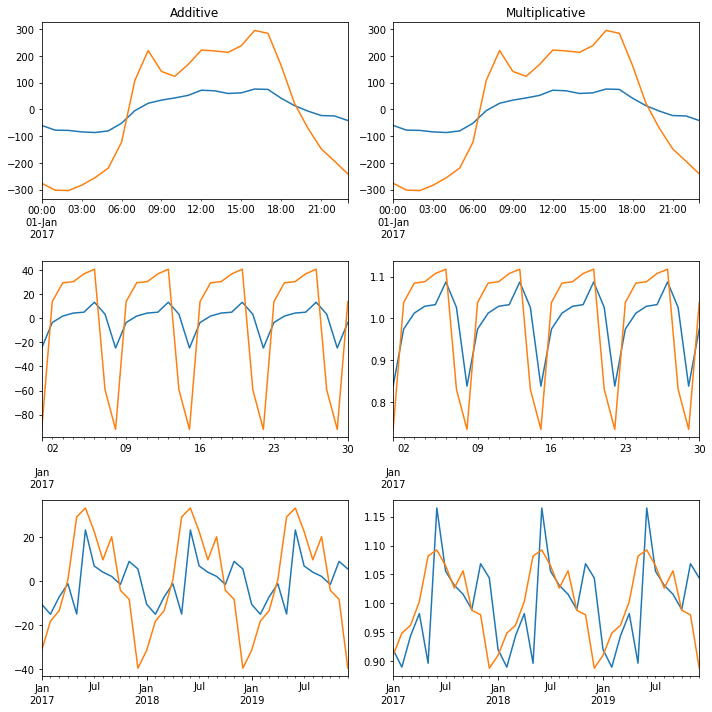

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
seasonal_decompose(ts_picadilly['Volume'], model='additive').seasonal[:24].plot()
seasonal_decompose(ts_sharston['Volume'], model='additive').seasonal[:24].plot()
plt.title('Additive')
plt.subplot(3,2,2)
seasonal_decompose(ts_picadilly['Volume'], model='additive').seasonal[:24].plot()
seasonal_decompose(ts_sharston['Volume'], model='additive').seasonal[:24].plot()
plt.title('Multiplicative')
plt.subplot(3,2,3)
seasonal_decompose(ts_picadilly_daily['Volume'], model='additive').seasonal[:30].plot()
seasonal_decompose(ts_sharston_daily['Volume'], model='additive').seasonal[:30].plot()
plt.subplot(3,2,4)
seasonal_decompose(ts_picadilly_daily['Volume'], model='multiplicative').seasonal[:30].plot()
seasonal_decompose(ts_sharston_daily['Volume'], model='multiplicative').seasonal[:30].plot()
plt.subplot(3,2,5)
seasonal_decompose(ts_picadilly_monthly['Volume'], model='additive').seasonal.plot()
seasonal_decompose(ts_sharston_monthly['Volume'], model='additive').seasonal.plot()
plt.subplot(3,2,6)
seasonal_decompose(ts_picadilly_monthly['Volume'], model='multiplicative').seasonal.plot()
seasonal_decompose(ts_sharston_monthly['Volume'], model='multiplicative').seasonal.plot()
plt.tight_layout()

In [35]:
fs_data = pd.DataFrame(np.concatenate((picadilly.values,sharston.values),axis=0),columns=picadilly.columns)

fs_data[['NO2','temp','ws','wd','Volume','day','month','hour']] =  fs_data[['NO2','temp','ws','wd','Volume','day','month','hour']].astype('int64')

fs_data = fs_data.drop(['day','month','hour','day_of_week','Lockdown','siteID'],axis=1)

from sklearn.preprocessing import scale

fs_data.iloc[:,:5] = scale( fs_data.iloc[:,:5],axis= 0 )
# for i in range(0,5):
#     scale(fs_data.iloc[:,i].to_numpy())
fs_data.columns


Index(['NO2', 'temp', 'ws', 'wd', 'Volume', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri',
       'Sat', 'Sun', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec', 'wd_1', 'wd_2', 'wd_3', 'wd_4'],
      dtype='object')

In [36]:
# grid search hyperparameters for lasso regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

In [37]:
data = fs_data.values
X, y = data[:, 1:], data[:, 0]

In [38]:
# define model
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0.01, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.662
Config: {'alpha': 0.01}


In [39]:
# getting weightings of indicators

# using model 2 
lasso_reg = Lasso(alpha=0.01,max_iter=1e5, selection = 'random')
lasso_reg.fit(X,y)

coefficients = list(fs_data.columns)
coefficients.remove('NO2')

predictor_weightings = pd.DataFrame(lasso_reg.coef_,index=coefficients,columns=['Weighting']).round(2)

#get predictors which have not been shrunk 
predictor_weightings = predictor_weightings[predictor_weightings['Weighting']!=0]

#sort predictors
predictor_weightings = predictor_weightings.reindex(predictor_weightings.Weighting.abs().sort_values(ascending=False).index)

predictor_weightings

Weighting
ws          -0.42
Dec          0.32
Jan          0.29
Sun         -0.23
Feb          0.21
temp        -0.19
wd_2         0.18
Nov          0.18
wd_4        -0.17
Aug         -0.12
Volume       0.10
Mar          0.09
wd_3         0.08
May         -0.06
Sat         -0.03
July        -0.01
Fri          0.01